In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as dates
import matplotlib.dates as mdates

In [2]:
#parameters
gamma = 0.12
beta = 0.2
delta_e = 1/5

In [3]:
#awp
N = 80850000
num_susceptibles = 80000000/N
num_exposed = 0#50000/N
num_infectious = 300000/N
num_removed = 500000/N

In [4]:
#ode
def model(z,t):
    dsdt = -beta * z[0] * z[2]
    dedt = beta * z[0] * z[2] - delta_e * z[1]
    didt = delta_e * z[1] - gamma * z[2]
    drdt = gamma * z[2]
    dz = [dsdt, dedt, didt, drdt]
    return dz

In [5]:
#set awp
z0 = [num_susceptibles, num_exposed, num_infectious, num_removed]
#set time
days = 200
t = np.linspace(0, days)

In [6]:
#solve ode
z = odeint(model,z0,t)

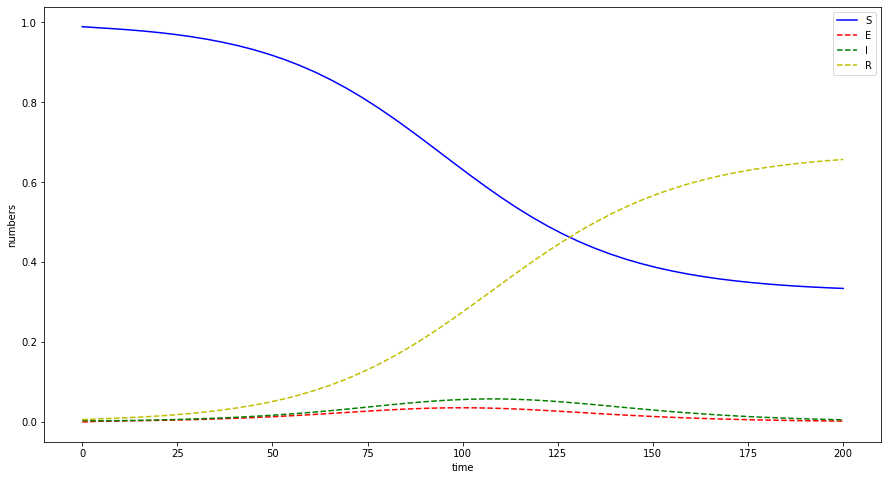

In [21]:
plt.plot(t,z[:,0],'b-', label = 'S')
plt.plot(t,z[:,1],'r--', label = 'E')
plt.plot(t,z[:,2],'g--', label = 'I')
plt.plot(t,z[:,3],'y--', label = 'R')
plt.ylabel('numbers')
plt.xlabel('time')
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = [15, 8]

In [8]:
# 22.03.  30.05.  20.09.  02.11.
total = 83*10**6 
total_cases = [25478,182652,272843,560860]
recovered = [250,164900,240100,364750]
deaths = [99,8485,9329,10669]

In [9]:
S = [(total-x)/total for x in total_cases]
E = [0,0,0,0]
I = [(x-y-z)/total for x,y,z in zip(total_cases,recovered,deaths)]
R = [(x+y)/total for x,y in zip(recovered,deaths)]

In [10]:
y0 = [S,E,I,R]
pred_length = 200
X = np.linspace(0,pred_length,num=pred_length)

In [11]:
y = []
for i in range(len(S)):
    y.append(odeint(model,[param[i] for param in y0],X))

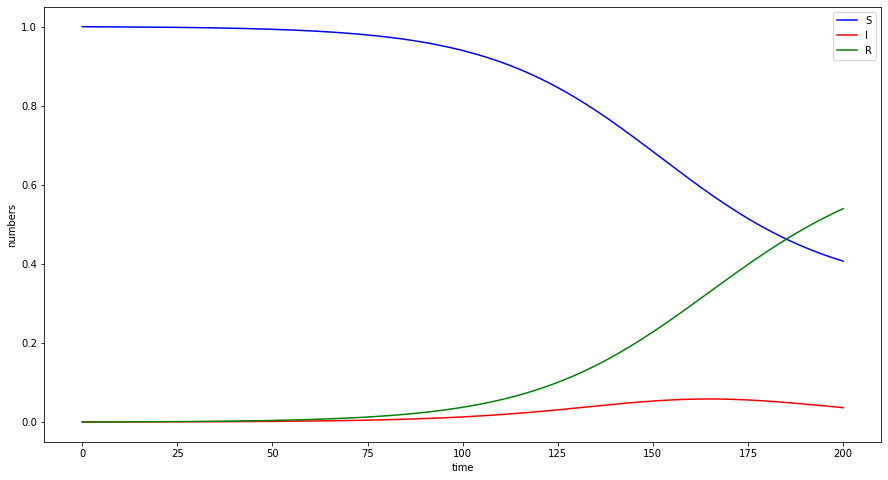

In [12]:
plt.plot(X,y[0][:,0],'-', label = 'S',color="blue")
# plt.plot(X,y[0][:,1],'r--', label = 'E',color="green")
plt.plot(X,y[0][:,2],'-', label = 'I',color="red")
plt.plot(X,y[0][:,3],'-', label = 'R',color="green")
plt.ylabel('numbers')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
plt.rcParams['figure.figsize'] = [15, 8]

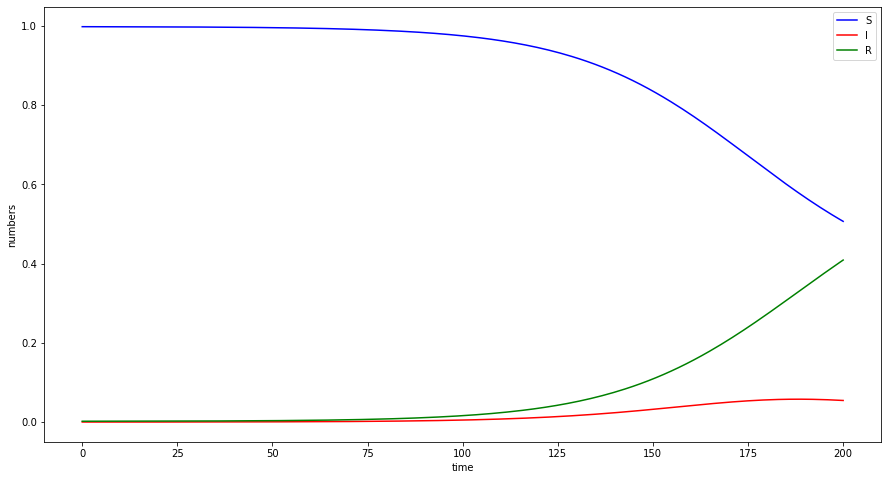

In [13]:
plt.plot(X,y[1][:,0],'-', label = 'S',color="blue")
# plt.plot(X,y[0][:,1],'r--', label = 'E',color="green")
plt.plot(X,y[1][:,2],'-', label = 'I',color="red")
plt.plot(X,y[1][:,3],'-', label = 'R',color="green")
plt.ylabel('numbers')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
plt.rcParams['figure.figsize'] = [15, 8]

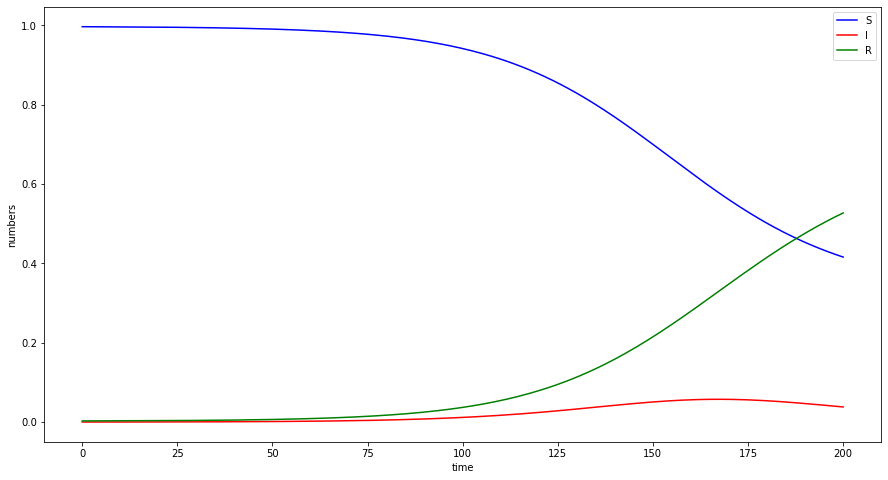

In [14]:
plt.plot(X,y[2][:,0],'-', label = 'S',color="blue")
# plt.plot(X,y[0][:,1],'r--', label = 'E',color="green")
plt.plot(X,y[2][:,2],'-', label = 'I',color="red")
plt.plot(X,y[2][:,3],'-', label = 'R',color="green")
plt.ylabel('numbers')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
plt.rcParams['figure.figsize'] = [15, 8]

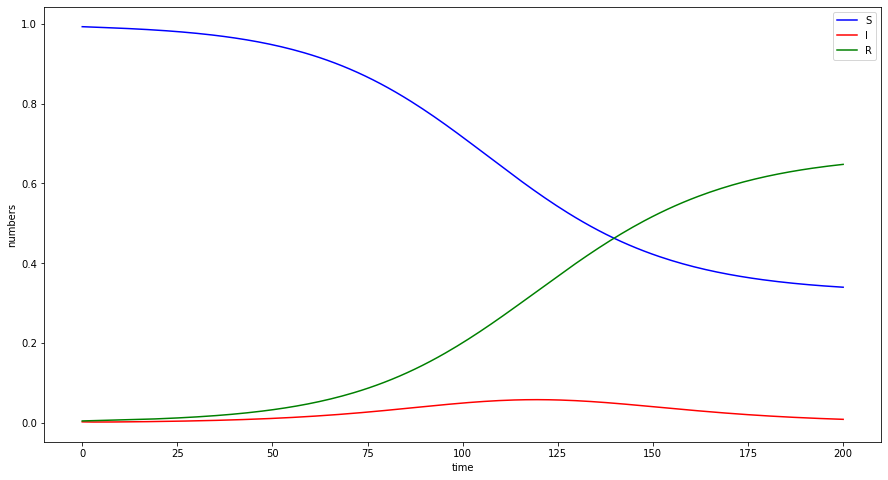

In [15]:
plt.plot(X,y[3][:,0],'-', label = 'S',color="blue")
# plt.plot(X,y[0][:,1],'r--', label = 'E',color="green")
plt.plot(X,y[3][:,2],'-', label = 'I',color="red")
plt.plot(X,y[3][:,3],'-', label = 'R',color="green")
plt.ylabel('numbers')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
plt.rcParams['figure.figsize'] = [15, 8]

In [16]:
data = pd.read_csv("data/full_data.csv")
germany = data[(data['location']=="Germany")].fillna(0)

In [17]:
x_dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in germany['date']]
crop = x_dates.index(datetime.date(2020,1,28))
x_dates = x_dates[crop:]
total_cases = np.array(germany['total_cases'][crop:])
total_cases = [x/total for x in total_cases]

Plot plain numbers

In [18]:
future_x = 30
def future_dates_of(dates,to):
    return [dates[0]+datetime.timedelta(days=x) 
            for x in range(len(dates)+to)]
future_x_dates = future_dates_of(x_dates,30)
checkpoints = [datetime.date(2020,3,22),
               datetime.date(2020,5,30),
               datetime.date(2020,9,20),
               datetime.date(2020,11,2),
               x_dates[-1]]
ind_checkpts = [x_dates.index(x) for x in checkpoints]

Plot plain numbers

In [19]:
future_x = 30
def future_dates_of(dates,to):
    return [dates[0]+datetime.timedelta(days=x) 
            for x in range(len(dates)+to)]
future_x_dates = future_dates_of(x_dates,30)
checkpoints = [datetime.date(2020,3,22),
               datetime.date(2020,5,30),
               datetime.date(2020,9,20),
               datetime.date(2020,11,2),
               x_dates[-1]]
ind_checkpts = [x_dates.index(x) for x in checkpoints]

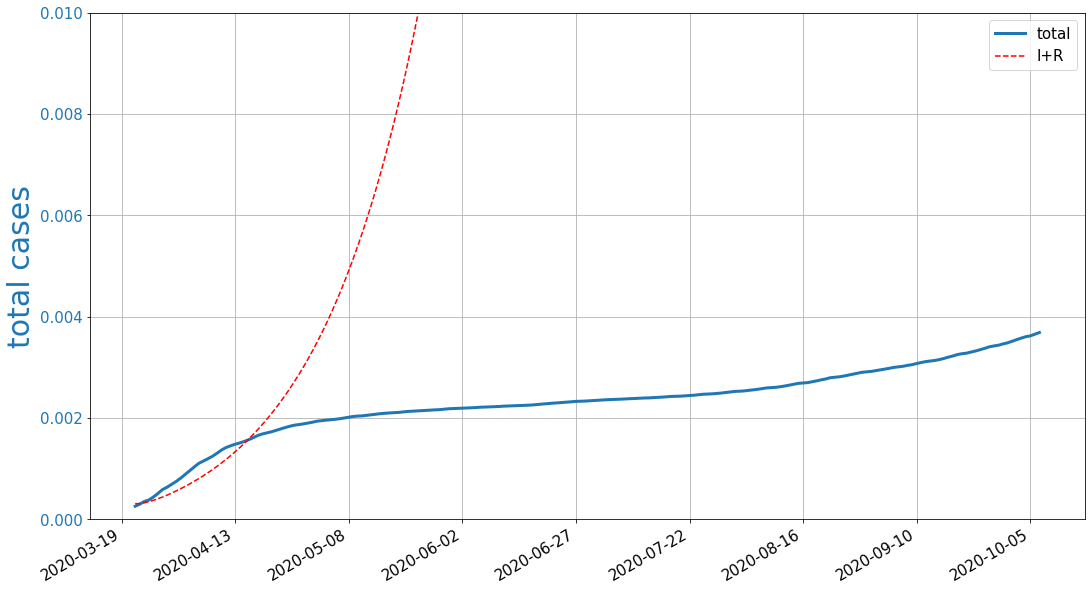

In [20]:
fig, ax1 = plt.subplots()

fig.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=25))

X_cropped = x_dates[ind_checkpts[0]:ind_checkpts[0]+200]

ax1.plot(X_cropped,total_cases[ind_checkpts[0]:ind_checkpts[0]+200],
         color="tab:blue",lw=3,label="total")
ax1.plot(X_cropped,[k+l for k,l in zip(y[0][:,2],y[0][:,3])],'--', label = 'I+R',
         color="red")
ax1.set_ylabel("total cases",color="tab:blue",fontsize=30)
ax1.tick_params(axis='y',labelcolor="tab:blue",labelsize=15)

fig.autofmt_xdate()
fig.tight_layout()

plt.legend(loc='best',fontsize=15)
plt.setp(ax1.get_xticklabels(), fontsize=15) 
plt.grid(axis='both')
plt.rcParams['figure.figsize'] = [15, 8]
plt.ylim(bottom=0,top=0.01);